In [1]:
import numpy as np
from torch_em.loss.wrapper import MaskIgnoreLabel, MaskIgnoreLabelFlatten
from torch_em.loss.dice import DiceLoss, flatten_samples
import matplotlib.pyplot as plt
import torch

/home/buglakov/miniconda3/envs/torchem_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/buglakov/miniconda3/envs/torchem_env/lib/python3.10/site-packages/bioimageio/spec/shared/_resolve_source.py:433: CacheWarning: found cached /tmp/buglakov/bioimageio_cache/https/raw.githubusercontent.com/bioimage-io/bioimage.io/main/site.config.json. Skipping download of https://raw.githubusercontent.com/bioimage-io/bioimage.io/main/site.config.json.
  warnings.warn(f"found cached {local_path}. Skipping download of {uri}.", category=CacheWarning)
/home/buglakov/miniconda3/envs/torchem_env/lib/python3.10/site-packages/bioimageio/spec/shared/_resolve_source.py:433: CacheWarning: found cached /tmp/buglakov/bioimageio_cache/https/bioimage-io.github.io/collection-bioimage-io/collection.json. Skipping download of h

In [16]:
pred = np.zeros((2, 4, 64, 128, 256))
pred[:, :, 20:40, 20:40, 20:40] = 1
target = np.zeros((2, 4, 64, 128, 256))
target[:, :, 20:40, 20:40, 20:40] = 0.5
target_masked = target
target_masked[:, :, 35:, :, :] = -1

pred = torch.tensor(pred)
target = torch.tensor(target)

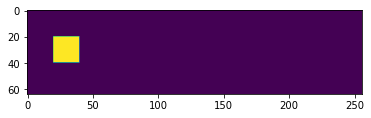

In [17]:
plt.imshow(pred[0, 0, :, 30, :])

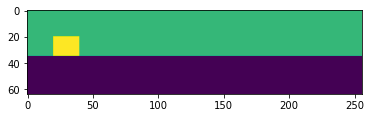

In [18]:
plt.imshow(target_masked[0, 0, :, 30, :])

In [19]:
loss = DiceLoss(flatten=True)
loss(pred, target)

tensor(3.9917, dtype=torch.float64)

In [24]:
flatten_samples(pred).shape

torch.Size([4, 4194304])

In [8]:
transform = MaskIgnoreLabelFlatten()

In [23]:
pred_masked, target_masked = transform(pred, target)
print(pred_masked.shape)
print(target_masked.shape)

torch.Size([4, 2293760])
torch.Size([4, 2293760])


In [25]:
loss_masked = DiceLoss(flatten=False)

In [26]:
loss_masked(pred_masked, target_masked)

tensor(0.8000, dtype=torch.float64)

In [27]:
loss(pred[:, :, :35, :, :], target[:, :, :35, :, :])

tensor(0.8000, dtype=torch.float64)

In [28]:
loss(pred, target)

tensor(3.9917, dtype=torch.float64)

In [29]:
transform_ignore = MaskIgnoreLabel()

In [30]:
pred_ignore, target_ignore = transform_ignore(pred, target)
loss(pred_ignore, target_ignore)

tensor(0.8000, dtype=torch.float64)